Que tipo de periodos desea usar? 
 Ingrese M = Mensual 
 Ingrese A = Anual
M
Ingrese el numero de periodos de la inversion: 
12
Ingrese el valor de cada uno de los ingresos separados por un espacio: 
[Ingresos periodo 0 al periodo 11 ] [Salvamento]
0 25000 32000 28000 15000 25600 28900 25000 24300 19000 19600 21600 20800
Ingrese el valor de cada uno de los egresos separados por un espacio: 
[Costo inicial] [Egresos del periodo 1 al periodo 12 ]
45000 12000 16000 12500 14500 18600 19500 17000 15600 12000 14000 12300 8500
Que tipo de tasa de interes desea usar? 
 Efectiva Vencida = EV
 Efectiva Anticipada = EA 
 Nominal Vencida = NV 
 Nominal Anticipada = NA
NA
Ingrese la tasa de interes %: 
5.6
Que tipo de periodo es la tasa nominal? 
 Mensual = M 
 Trimestral = T 
 Semestral = S 
 Anual = A
M


Metodos de evaluación y tasas de interes: 
TIO: 0.05773632 %
VPN: 36746.78100134481
CMUE: 4328.81580675912
TIR: 0.20879124334207755 %
TIRM: 7.7618158966979545 %
B/C: 1.2182202781995655


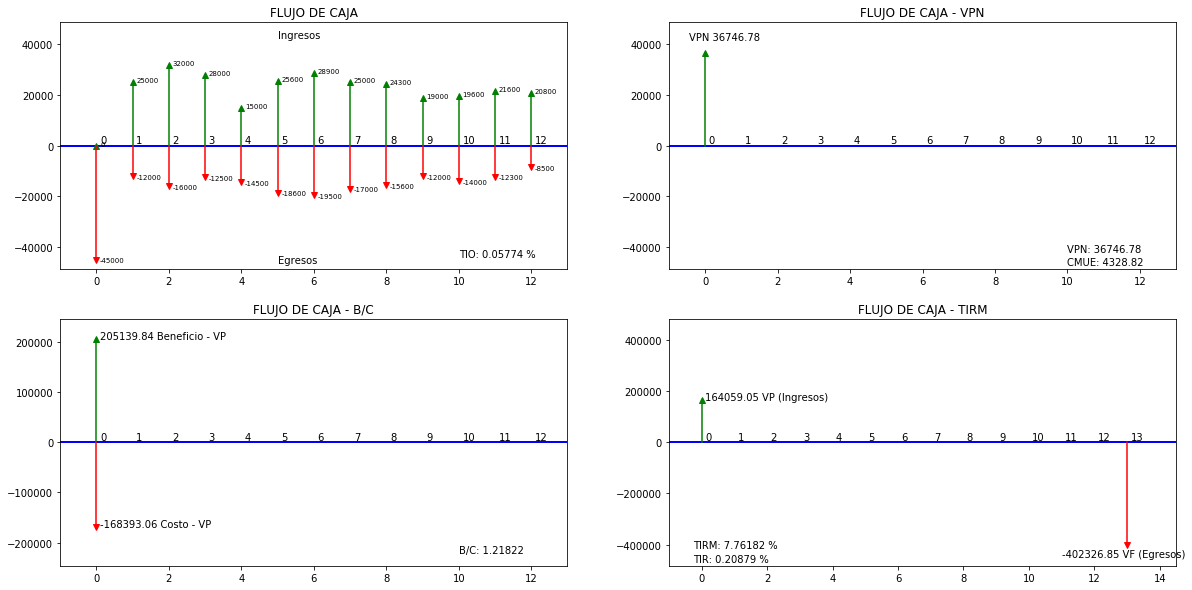

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def VPN(ingresos, egresos, tio):
    neto = 0
    for i in range(0, len(egresos)):
        neto = neto - (egresos[i] * (1 + tio) ** -i)
    for i in range(0, len(ingresos)):
        neto = neto + (ingresos[i] * (1 + tio) ** -i)
    return neto


def TIRM(ingreso, egresos, tio, n):
    p = 0
    f = 0
    d = 0
    for i in range(0, n):
        p = p + (egresos[i] * (1 + tio) ** -i)
    for i in range(n, -1, -1):
        f = f + (ingreso[d] * (1 + tio) ** i)
        d = d + 1
    tirm = ((f / p) ** (1 / n)) - 1
    tsalida = [tirm*100,p,f]
    return tsalida


def BC(ingreso, egreso, tio):
    Beneficio = 0
    Costo = 0
    for i in range(0, len(egreso)):
        Costo = Costo + (egreso[i] * (1 + tio) ** -i)
    for i in range(0, len(ingreso)):
        Beneficio = Beneficio + (ingreso[i] * (1 + tio) ** -i)
    bcfinal = Beneficio / Costo
    salida = [bcfinal,Beneficio,Costo]
    return salida


def CalcularEaE(Tipo, tasa, p):
    tasac = ((1 + tasa) ** (Tipo / p)) - 1
    return tasac


def CalcularEAaE(Tipo, tasa, p):
    tasac = tasa / (1 - tasa)
    tasaf = CalcularEaE(Tipo, tasac,p)
    return tasaf

def CAUE(vpn, tio, n):
    ca = vpn * (((1+tio)**n*tio)/(((1+tio)**n)-1))
    return ca


def CalcularNaE(Tipo, tasa, p):
    if p == 1:
        tasac = ((1 + (tasa / Tipo)) ** Tipo) - 1
        return tasac
    if p == 12:
        tasac = ((1 + (tasa / Tipo)) ** Tipo) - 1
        if Tipo < 0:
            tasaf = CalcularEaE(-Tipo, tasac, p)
            return tasaf
        if Tipo > 0:
            tasaf = CalcularEaE(Tipo, tasac, p)
            return tasaf

def TipoT(tasas):
    if tasas == "M":
        return 12
    if tasas == "T":
        return 4
    if tasas == "S":
        return 2
    if tasas == "A":
        return 1

def totales(ingreso,egreso):
    aux = []
    for i in range(0, len(ingreso)):
        aux.append(ingreso[i]-egreso[i])
    return aux

def Maxivalor (a,b):
    if max(a) < max(b):
        return max(b)
    if max(a) > max(b):
        return max(a)
    else:
        return max(a)

def Lineamedida(lim,n):
    if n > 0:
        x = 0.5 + (n*0.5)/lim
    if n < 0:
        x = 0.5 - (-n*0.5)/lim
    if n == 0:
        x = 0.5
    return x

"""
INICIO
"""

print("Que tipo de periodos desea usar? \n Ingrese M = Mensual \n Ingrese A = Anual")
p = input()

if p == "A":
    per = 1
if p == "M":
    per = 12

print("Ingrese el numero de periodos de la inversion: ")
n = int(input())

print("Ingrese el valor de cada uno de los ingresos separados por un espacio: ")
print("[Ingresos periodo 0 al periodo "+str(n-1)+" ] [Salvamento]")
ingreso = input().split()
ingreso = list(map(int, ingreso))

print("Ingrese el valor de cada uno de los egresos separados por un espacio: ")
print("[Costo inicial] [Egresos del periodo 1 al periodo "+str(n)+" ]")
egreso = input().split()
egreso = list(map(int, egreso))

print(
    "Que tipo de tasa de interes desea usar? \n Efectiva Vencida = EV\n Efectiva Anticipada = EA \n Nominal Vencida = NV \n Nominal Anticipada = NA")
Tipotasa = input()
print("Ingrese la tasa de interes %: ")
tasa = input()
tasa = float(tasa) / 100
Tio = 0  # Tasa de interes

if Tipotasa == "EV":
    print("Que tipo de periodo es la tasa efectiva? \n Mensual = M \n Trimestral = T \n Semestral = S \n Anual = A")
    efectiva = input()
    tipo = TipoT(efectiva)
    Tio = CalcularEaE(tipo, tasa, per)

if Tipotasa == "EA":
    print("Que tipo de periodo es la tasa efectiva? \n Mensual = M \n Trimestral = T \n Semestral = S \n Anual = A")
    efectiva = input()
    tipo = TipoT(efectiva)
    Tio = CalcularEAaE(tipo, tasa, per)

if Tipotasa == "NV":
    print("Que tipo de periodo es la tasa nominal? \n Mensual = M \n Trimestral = T \n Semestral = S \n Anual = A")
    nominal = input()
    tipo = TipoT(nominal)
    Tio = CalcularNaE(tipo, tasa, per)

if Tipotasa == "NA":
    print("Que tipo de periodo es la tasa nominal? \n Mensual = M \n Trimestral = T \n Semestral = S \n Anual = A")
    nominal = input()
    tipo = TipoT(nominal)
    Tio = CalcularNaE(-tipo, tasa, per)

print("\n")
print("Metodos de evaluación y tasas de interes: ")
print("TIO: "+ str("{0:.8f}".format(Tio)+" %"))
vpn = VPN(ingreso, egreso, Tio)
print("VPN: " + str(vpn))
ca = CAUE(vpn,Tio,n)
if per == 1:
    print("CAUE: "+str(ca))
if per == 12:
    print("CMUE: "+str(ca))
IRR = np.irr(totales(ingreso,egreso))
print("TIR: "+str(IRR)+" %")
tirm = TIRM(ingreso, egreso, Tio, n)
print("TIRM: " + str(tirm[0]) + " %")
bc = BC(ingreso, egreso, Tio)
print("B/C: " + str(bc[0]))
lim = Maxivalor(ingreso,egreso)
lim = lim+(lim/n)

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.axis((-1,n+1,-lim,lim))
plt.axhline(linewidth=2, color='b')
plt.title('FLUJO DE CAJA')
plt.text(n-2, -lim+(lim/10), "TIO: "+str("{0:.5f}".format(Tio)+" %"))
plt.annotate("Ingresos", (n/2-1, lim-lim/8))
plt.annotate("Egresos", (n/2-1, -lim+lim/20))
for i in range(0,len(ingreso)):
    yi = Lineamedida(lim,ingreso[i])
    ye = Lineamedida(lim,-egreso[i])
    plt.annotate(str(ingreso[i]), (i+0.1, ingreso[i]+0.5), fontsize = 7)
    plt.annotate(str(-egreso[i]), (i + 0.1, -egreso[i] - 1000), fontsize = 7)
    plt.plot(i,ingreso[i],"^", color = 'g')
    plt.plot(i, -egreso[i], "v", color='r')
    plt.annotate(i, (i + 0.1, lim/50))
    plt.axvline(x=i, ymin=0.5, ymax=yi, color ='g')
    plt.axvline(x=i, ymin=ye, ymax=0.5, color = 'r')

plt.subplot(2, 2, 2)
plt.axis((-1,n+1,-lim,lim))
plt.axhline(linewidth=2, color='b')
plt.title('FLUJO DE CAJA - VPN')
y = Lineamedida(lim,vpn)
plt.text(n-2, -lim+(lim/7), "VPN: "+str("{0:.2f}".format(vpn)))
if per == 1:
    plt.text(n - 2, -lim + (lim / 30), "CAUE: " + str("{0:.2f}".format(ca)))
if per == 12:
    plt.text(n - 2, -lim + (lim / 30), "CMUE: " + str("{0:.2f}".format(ca)))
for i in range(0,len(ingreso)):
    plt.annotate(i, (i + 0.1, lim / 50))
if y > 0.5:
    plt.axvline(x=0, ymin=0.5, ymax=y, color ='g')
    plt.annotate("VPN " + str("{0:.2f}".format(vpn)), (-0.45, vpn + lim/10))
    plt.plot(0, vpn, "^", color='g')
if y < 0.5:
    plt.axvline(x=0, ymin=y, ymax=0.5, color = 'r')
    plt.annotate("VPN " + str("{0:.2f}".format(vpn)), (-0.45, vpn - lim/10))
    plt.plot(0, vpn, "v", color='r')

plt.subplot(2, 2, 3)
bclim = max(bc[1],bc[2])
bclim = bclim + bclim/5
plt.axis((-1,n+1,-bclim,bclim))
plt.axhline(linewidth=2, color='b')
plt.title('FLUJO DE CAJA - B/C')
y = Lineamedida(bclim,bc[1])
x = Lineamedida(bclim,-bc[2])
plt.text(n-2, -bclim+(bclim/10), "B/C: "+str("{0:.5f}".format(bc[0])))
for i in range(0,len(ingreso)):
    plt.annotate(i, (i + 0.1, bclim / 50))
plt.annotate(str("{0:.2f}".format(bc[1]))+" Beneficio - VP", (0.1, bc[1]))
plt.annotate(str("{0:.2f}".format(-bc[2]))+" Costo - VP", (0.1, -bc[2]))
plt.axvline(x=0, ymin=0.5, ymax=y, color ='g')
plt.plot(0,bc[1],"^", color = 'g')
plt.axvline(x=0, ymin=x, ymax=0.5, color = 'r')
plt.plot(0,-bc[2],"v", color = 'r')

plt.subplot(2, 2, 4)
tmlim = max(tirm[1],tirm[2])
tmlim = tmlim + tmlim/5
plt.axis((-1,n+2.5,-tmlim,tmlim))
plt.axhline(linewidth=2, color='b')
plt.title('FLUJO DE CAJA - TIRM')
y = Lineamedida(tmlim,tirm[1])
x = Lineamedida(tmlim,-tirm[2])
plt.text(-0.25, -tmlim+(tmlim/7), "TIRM: "+str("{0:.5f}".format(tirm[0])+" %"))
plt.text(-0.25, -tmlim+(tmlim / 30), "TIR: " + str("{0:.5f}".format(IRR)+" %"))
for i in range(0,len(ingreso)+1):
    plt.annotate(i, (i + 0.1, tmlim / 50))
plt.annotate(str("{0:.2f}".format(tirm[1]))+" VP (Ingresos)", (0.1, tirm[1]))
plt.annotate(str("{0:.2f}".format(-tirm[2]))+" VF (Egresos)", (n-1, -tirm[2]-tirm[2]/9))
plt.axvline(x=0, ymin=0.5, ymax=y, color ='g')
plt.plot(0,tirm[1],"^", color = 'g')
plt.axvline(x=n+1, ymin=x, ymax=0.5, color = 'r')
plt.plot(n+1,-tirm[2],"v", color = 'r')

plt.show()